In [1]:
import pandas as pd
import pandas_profiling

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/bharadhwaj02/Retail-Market-Analysis/main/Market_Basket_Optimisation%20(1).csv")

In [3]:
data.shape

(7500, 20)

In [4]:
data.head

<bound method NDFrame.head of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0         

In [5]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print(data.isnull().values.any())

True


In [7]:
 # Drop only those rows where all the row values are null values
print(data.dropna(axis=0))

Empty DataFrame
Columns: [shrimp, almonds, avocado, vegetables mix, green grapes, whole weat flour, yams, cottage cheese, energy drink, tomato juice, low fat yogurt, green tea, honey, salad, mineral water, salmon, antioxydant juice, frozen smoothie, spinach, olive oil]
Index: []


In [8]:
data.shape

(7500, 20)

In [9]:
data.head

<bound method NDFrame.head of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0         

In [10]:
# data cleaning
# Finding items that start or end with whitespace
all_products = data.melt()["value"].dropna().sort_values()
all_products[all_products.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [11]:
data.replace(" asparagus", "asparagus", inplace=True)
all_products.replace(" asparagus", "asparagus", inplace=True)

In [12]:
print(f"There are {all_products.nunique()} different products:\n\n", all_products.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

In [13]:
# Exploratory data analysis
import matplotlib as mpl
import seaborn as sns
from matplotlib.axes import Axes
sns.set_palette("autumn")
mpl.rc("axes", titlesize=18, titlepad=15, titleweight=500)
mpl.rc("axes.spines", right=False, top=False)
mpl.rc("figure", figsize=(10, 5.5))
mpl.rc("font", family="serif", size=10)

In [14]:
def annotate_column_chart(ax: Axes) -> Axes:
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax

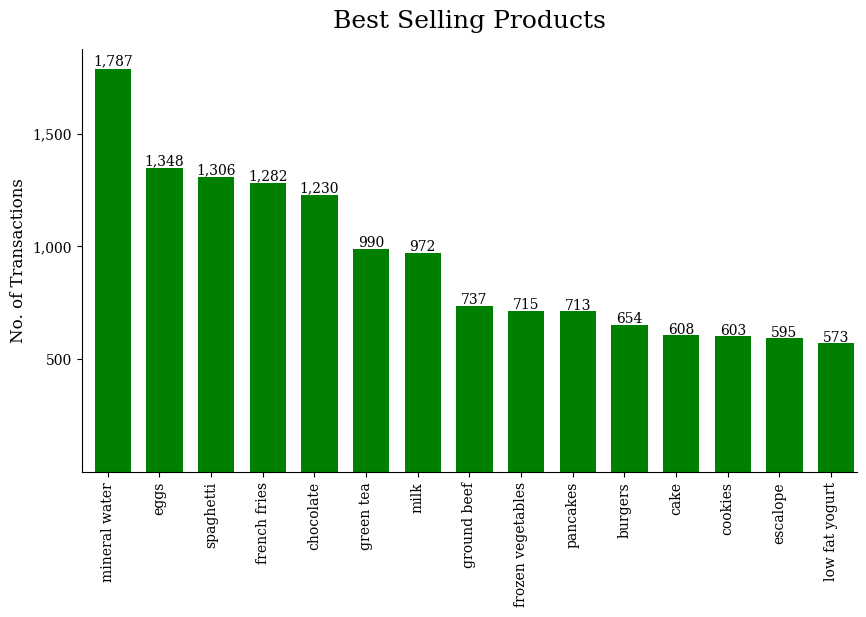

In [15]:
# Best performing 
item_counts = all_products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar",color="green", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

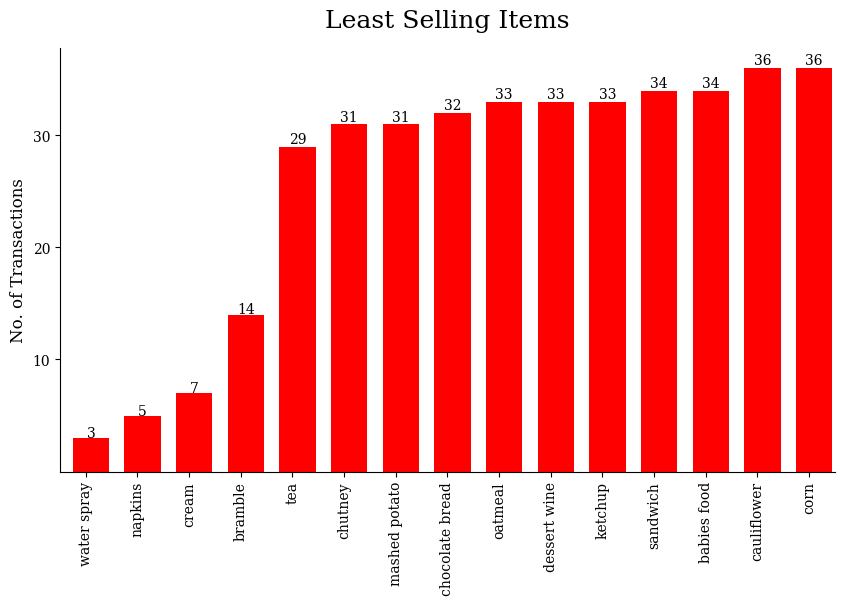

In [16]:
# Worst performing products 
ax = item_counts.nsmallest(15).plot(kind="bar", color="red", title="Least Selling Items")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([10, 20, 30]))

_ = annotate_column_chart(ax)

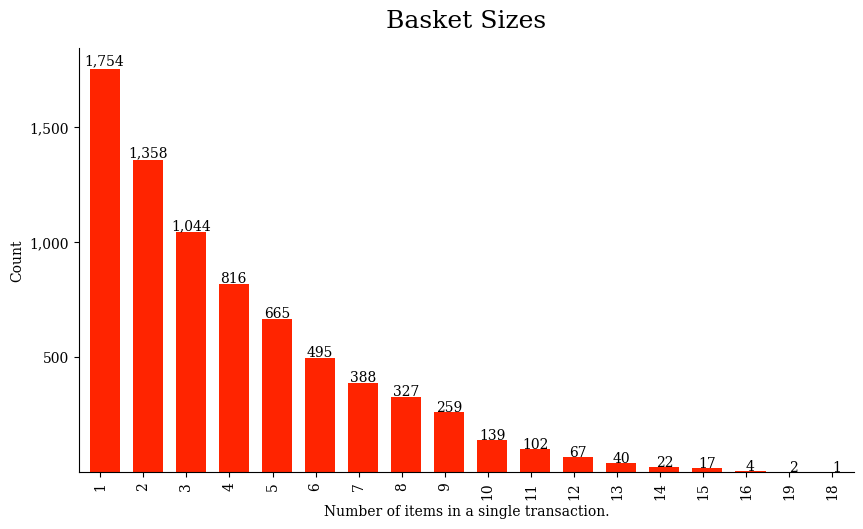

In [17]:
# Average items in a basket
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

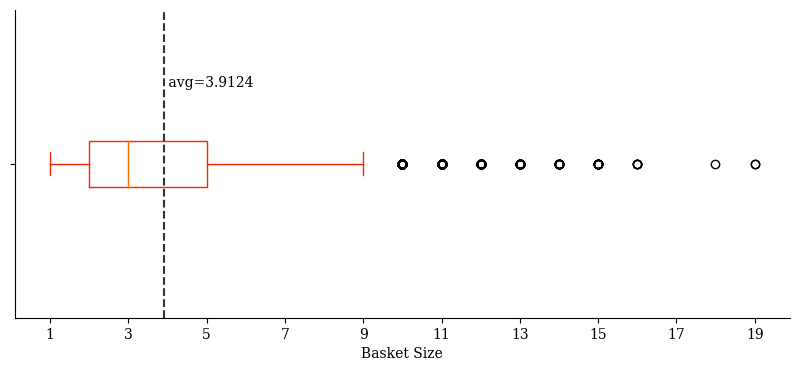

In [18]:
avg_basket_size = basket_sizes.mean()
ax = basket_sizes.plot.box(vert=False, figsize=(10, 4))
ax.axvline(avg_basket_size, 0, 1, linestyle="--", label="mean", color="#333")
ax.text(avg_basket_size, 1.25, f" avg={avg_basket_size:.4f}")
ax.set_xlabel("Basket Size")
ax.set_yticklabels([])
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(range(1, 21, 2)))

In [19]:
basket_sizes.describe()

count    7500.00000
mean        3.91240
std         2.89979
min         1.00000
25%         2.00000
50%         3.00000
75%         5.00000
max        19.00000
dtype: float64

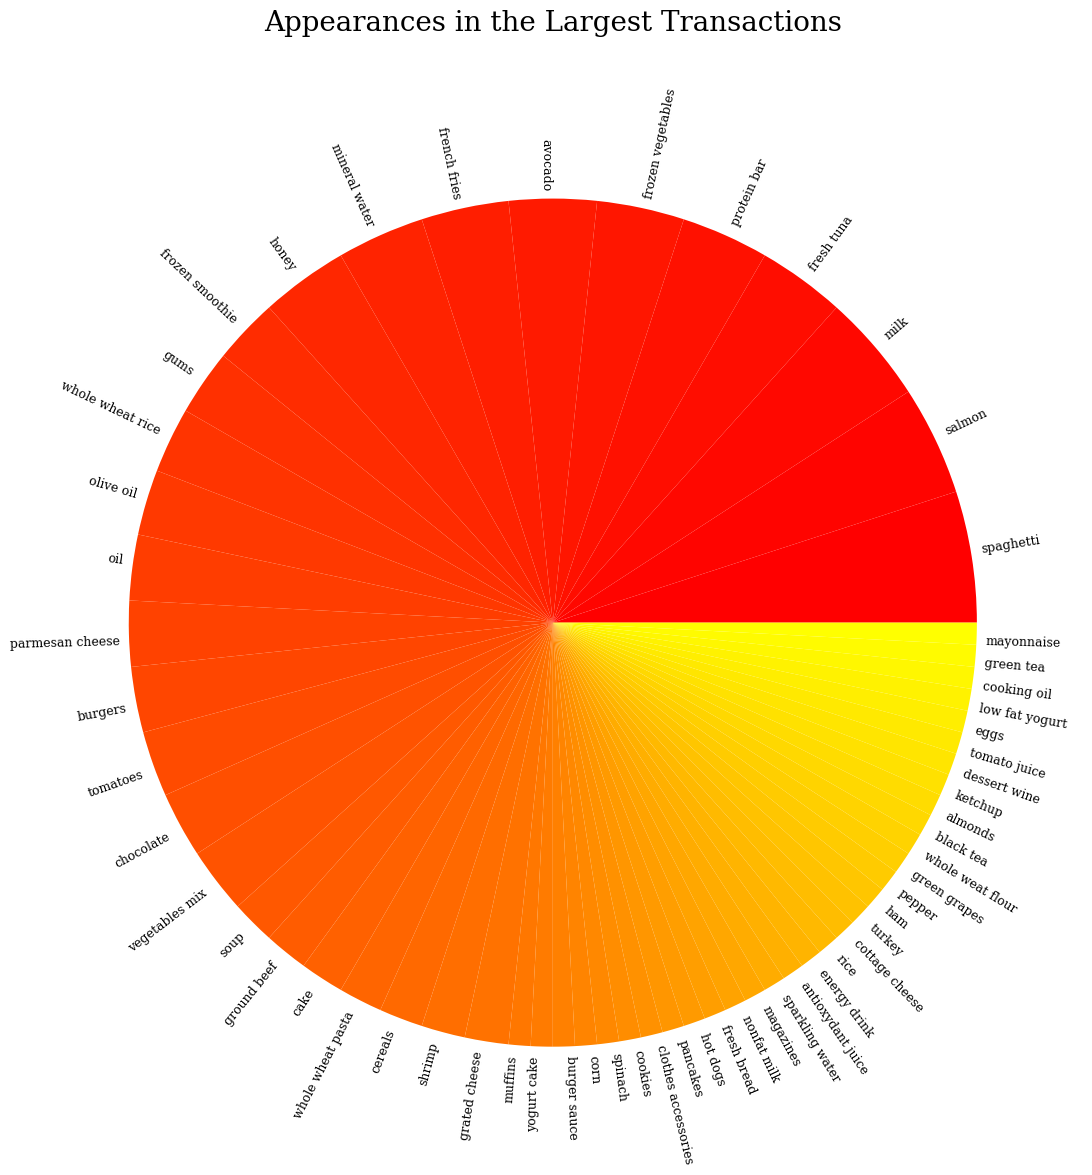

In [22]:
# items in the largest  transactions
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()

pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(
    cmap="autumn",
    figsize=(12, 12),
    pctdistance=0.8,
    labeldistance=1.02,
    rotatelabels=True,
    textprops={"size": 9},
)
ax.set_title("Appearances in the Largest Transactions", size=20, pad=45)
ax.set_ylabel("")
ax.figure.tight_layout()

In [28]:
baskets = [tuple(row.dropna()) for _, row in data[basket_sizes > 1].iterrows()]
baskets[-5:]

[('pancakes', 'light mayo'),
 ('butter', 'light mayo', 'fresh bread'),
 ('burgers',
  'frozen vegetables',
  'eggs',
  'french fries',
  'magazines',
  'green tea'),
 ('escalope', 'green tea'),
 ('eggs', 'frozen smoothie', 'yogurt cake', 'low fat yogurt')]

In [29]:
from efficient_apriori import apriori

item_sets, association_rules = apriori(baskets, min_support=0.03, min_confidence=0.3)

# Get 1 to 1 rules e.g. {bread} -> {butter}
one_to_one_rules = filter(
    lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, association_rules
)
for rule in sorted(one_to_one_rules, key=lambda rule: rule.lift):
    print(rule)

{eggs} -> {mineral water} (conf: 0.304, supp: 0.066, lift: 1.030, conv: 1.013)
{shrimp} -> {mineral water} (conf: 0.338, supp: 0.031, lift: 1.146, conv: 1.065)
{low fat yogurt} -> {mineral water} (conf: 0.339, supp: 0.031, lift: 1.150, conv: 1.067)
{chocolate} -> {mineral water} (conf: 0.342, supp: 0.069, lift: 1.159, conv: 1.071)
{cake} -> {mineral water} (conf: 0.356, supp: 0.036, lift: 1.207, conv: 1.095)
{spaghetti} -> {mineral water} (conf: 0.357, supp: 0.078, lift: 1.212, conv: 1.097)
{tomatoes} -> {mineral water} (conf: 0.370, supp: 0.032, lift: 1.257, conv: 1.120)
{pancakes} -> {mineral water} (conf: 0.375, supp: 0.044, lift: 1.273, conv: 1.129)
{milk} -> {mineral water} (conf: 0.383, supp: 0.063, lift: 1.300, conv: 1.144)
{frozen vegetables} -> {mineral water} (conf: 0.385, supp: 0.047, lift: 1.306, conv: 1.147)
{frozen vegetables} -> {spaghetti} (conf: 0.300, supp: 0.036, lift: 1.376, conv: 1.117)
{ground beef} -> {mineral water} (conf: 0.429, supp: 0.053, lift: 1.454, conv: 